In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path().resolve().parent))
# print(str(Path().resolve().parent))
print(sys.path)
import os
os.environ['OMP_NUM_THREADS'] = "1"

['C:\\Users\\kazum\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'C:\\Users\\kazum\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'C:\\Users\\kazum\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'C:\\Users\\kazum\\AppData\\Local\\Programs\\Python\\Python311', 'd:\\github\\scikit-quri\\pyenv', '', 'd:\\github\\scikit-quri\\pyenv\\Lib\\site-packages', 'd:\\github\\scikit-quri\\pyenv\\Lib\\site-packages\\win32', 'd:\\github\\scikit-quri\\pyenv\\Lib\\site-packages\\win32\\lib', 'd:\\github\\scikit-quri\\pyenv\\Lib\\site-packages\\Pythonwin', 'D:\\github\\scikit-quri']


In [2]:
from pathlib import Path
# import sys
# sys.path.append(str(Path().resolve().parent.parent))

# import better_exceptions
import numpy as np
from typing import Optional
from quri_parts.circuit.utils.circuit_drawer import draw_circuit
from quri_parts.circuit import UnboundParametricQuantumCircuit,LinearMappedUnboundParametricQuantumCircuit
from numpy.random import default_rng
from scikit_quri.circuit.circuit import LearningCircuit

from qulacs import Observable
from quri_parts.core.operator import Operator, pauli_label
from quri_parts.core.estimator.gradient import (
    create_parameter_shift_gradient_estimator,
    create_numerical_gradient_estimator,)
from quri_parts.qulacs.estimator import (
    create_qulacs_vector_concurrent_estimator,
    create_qulacs_vector_parametric_estimator,
    create_qulacs_vector_concurrent_parametric_estimator,
)
from quri_parts.algo.optimizer import Adam, LBFGS




In [3]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
x = df.loc[:, ["petal length (cm)", "petal width (cm)"]]
x_train,x_test,y_train,y_test = train_test_split(x,iris.target,test_size=0.25,random_state=0)

x_train = x_train.to_numpy()

from quri_parts.circuit.utils.circuit_drawer import draw_circuit
import matplotlib.pyplot as plt
n_qubits = 5
num_class = 3
print(x_train)

[[4.2 1.5]
 [4.  1.2]
 [5.5 2.1]
 [1.3 0.2]
 [5.1 2.3]
 [1.6 0.6]
 [1.5 0.2]
 [3.5 1. ]
 [5.5 1.8]
 [5.7 2.5]
 [5.  1.5]
 [5.8 1.8]
 [3.9 1.1]
 [6.1 2.3]
 [4.7 1.6]
 [3.8 1.1]
 [4.9 1.8]
 [5.1 1.5]
 [4.5 1.7]
 [5.  1.9]
 [4.7 1.4]
 [5.2 2. ]
 [4.5 1.6]
 [1.6 0.2]
 [5.1 1.9]
 [4.2 1.3]
 [3.6 1.3]
 [4.  1.3]
 [4.6 1.4]
 [6.  1.8]
 [1.5 0.2]
 [1.1 0.1]
 [5.3 1.9]
 [4.2 1.2]
 [1.7 0.2]
 [1.5 0.4]
 [4.9 1.5]
 [1.5 0.2]
 [5.1 1.8]
 [3.  1.1]
 [1.4 0.3]
 [4.5 1.5]
 [6.1 2.5]
 [4.2 1.3]
 [1.4 0.1]
 [5.9 2.1]
 [5.7 2.3]
 [5.8 2.2]
 [5.6 2.1]
 [1.6 0.2]
 [1.6 0.2]
 [5.1 2. ]
 [5.7 2.1]
 [1.3 0.3]
 [5.4 2.3]
 [1.4 0.2]
 [5.  2. ]
 [5.4 2.1]
 [1.3 0.2]
 [1.4 0.2]
 [5.8 1.6]
 [1.4 0.3]
 [1.3 0.2]
 [1.7 0.4]
 [4.  1.3]
 [5.9 2.3]
 [6.6 2.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.5 1.3]
 [4.4 1.4]
 [1.2 0.2]
 [1.7 0.5]
 [4.3 1.3]
 [1.5 0.4]
 [6.9 2.3]
 [3.3 1. ]
 [6.4 2. ]
 [4.4 1.4]
 [1.5 0.1]
 [4.8 1.8]
 [1.2 0.2]
 [6.7 2. ]
 [1.5 0.3]
 [1.6 0.2]
 [6.1 1.9]
 [1.4 0.2]
 [5.6 2.4]
 [4.1 1.3]
 [3.9 1.2]

In [4]:
from scikit_quri.circuit.pre_defined import create_qcl_ansatz,create_farhi_neven_ansatz
# circuit = create_farhi_neven_ansatz(n_qubits, 2,0)
circuit = create_qcl_ansatz(n_qubits,3,1.)
draw_circuit(circuit.circuit)
print(circuit.circuit.parameter_count)

   ___     ___     ___     ___     ___     ___     ___     ___     ___     ___  
  |PRY|   |PRZ|   |Mat|   |PRX|   |PRZ|   |PRX|   |Mat|   |PRX|   |PRZ|   |PRX| 
--|0  |---|1  |---|10 |---|11 |---|12 |---|13 |---|26 |---|27 |---|28 |---|29 |-
  |___|   |___|   |   |   |___|   |___|   |___|   |   |   |___|   |___|   |___| 
   ___     ___    |   |    ___     ___     ___    |   |    ___     ___     ___  
  |PRY|   |PRZ|   |   |   |PRX|   |PRZ|   |PRX|   |   |   |PRX|   |PRZ|   |PRX| 
--|2  |---|3  |---|   |---|14 |---|15 |---|16 |---|   |---|30 |---|31 |---|32 |-
  |___|   |___|   |   |   |___|   |___|   |___|   |   |   |___|   |___|   |___| 
   ___     ___    |   |    ___     ___     ___    |   |    ___     ___     ___  
  |PRY|   |PRZ|   |   |   |PRX|   |PRZ|   |PRX|   |   |   |PRX|   |PRZ|   |PRX| 
--|4  |---|5  |---|   |---|17 |---|18 |---|19 |---|   |---|33 |---|34 |---|35 |-
  |___|   |___|   |   |   |___|   |___|   |___|   |   |   |___|   |___|   |___| 
   ___     ___    |   |    _

In [5]:
from quri_parts.core.state import quantum_state
param_circuit_state = quantum_state(n_qubits=5,circuit=circuit.circuit)
init_params = [np.random.rand() for _ in range(circuit.n_learning_params)]
params = circuit.generate_bound_params(x_train[0],init_params)
circuit_state = param_circuit_state.bind_parameters(params)

from quri_parts.qulacs.estimator import create_qulacs_vector_estimator
from quri_parts.core.operator import Operator, pauli_label

op = Operator({pauli_label("Z0"): 1.0})
# estimator = create_qulacs_vector_estimator()
estimator = create_qulacs_vector_concurrent_estimator()
estimate = create_qulacs_vector_estimator()(op, circuit_state)

In [6]:
from scikit_quri.qnn.classifier import QNNClassifier

ops = []
for i in range(num_class):
    op = Operator({pauli_label(f"Z {i}"):1.0})
    ops.append(op)

adam = Adam()
estimator = create_qulacs_vector_concurrent_estimator()
gradient_estimator = create_numerical_gradient_estimator(create_qulacs_vector_concurrent_parametric_estimator(),delta=1e-10)
qnn = QNNClassifier(circuit,num_class,estimator,gradient_estimator,adam,ops,)

In [7]:
qnn.fit(x_train,y_train,maxiter=50)

init_params=array([5.98123075, 2.70260767, 5.28353811, 0.55851586, 0.54738976,
       2.89266767, 2.13271796, 5.27248417, 2.15715927, 2.01945113,
       3.87769853, 0.42781982, 2.01147295, 1.10334193, 3.44604958,
       1.68943572, 5.02133536, 2.1390706 , 5.82076764, 1.19305435,
       0.28996101, 0.19567704, 5.8064484 , 3.15361245, 5.92779038,
       5.66777326, 2.12492172, 0.57469568, 6.23982331, 3.53896306,
       5.24380423, 4.94042736, 1.88095503, 1.12881711, 1.18542872,
       1.44880115, 1.48022656, 5.22172162, 5.46435467, 4.65353414,
       5.78632789, 1.35458224, 5.97350073, 4.7230576 , 0.6118621 ])
optimizer_state.cost=0.8507451607472599
optimizer_state.cost=0.7436890500017453
optimizer_state.cost=0.6655164598348335
optimizer_state.cost=0.6119285009468315
optimizer_state.cost=0.5768747510998619
optimizer_state.cost=0.5554237225616132
optimizer_state.cost=0.5432305364288835
optimizer_state.cost=0.536144009602092
optimizer_state.cost=0.5309513315731925
optimizer_state.cost=0.52

d:\github\scikit-quri\pyenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


0.39661976372248126


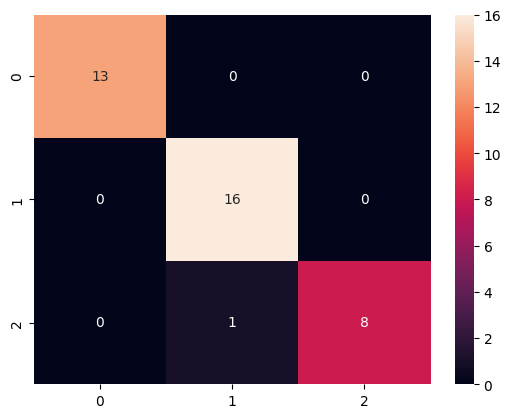

In [8]:
y_pred = qnn.predict(x_test)
from scipy.special import softmax
from sklearn.metrics import log_loss, confusion_matrix
import seaborn as sns

y_pred_sm = softmax(y_pred,axis=1)
log = log_loss(y_test,y_pred_sm)
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
# log = log_loss(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(log)